In [1]:
# packages
import sys
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# read data
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df = pd.DataFrame(data)

In [5]:
# Use one-hot encoding in order to appropriately convert categorical values to numeric values
df_encoded = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [6]:
# used to scale features, improves accuracy
sc = StandardScaler()

In order to linear regression on this dataset, the dataset most fulfill a set of assumptions.
The dependent variable must be a binary variable: The "HeartDisease" variable is our dependent variable, and it is binary. In addition, there must be a significant amount of samples in the dataset: This dataset has 918 samples, so it is enough. Finally, all of the predictor variables need to present little to no multicollinearity. We can confirm this using the VIF score procedure.

In [7]:
# prints VIF results for predictor variables. Looking for VIF results less than 6
x = df_encoded.drop("HeartDisease", axis=1)  
x
vif = pd.DataFrame()    
vif["feature"] = x.columns 
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 
print(vif)

              feature        VIF
0                 Age  31.150961
1           RestingBP  48.692652
2         Cholesterol   5.311972
3           FastingBS   1.495666
4               MaxHR  26.978673
5             Oldpeak   2.597620
6               Sex_M   4.977765
7   ChestPainType_ATA   1.855230
8   ChestPainType_NAP   1.622496
9    ChestPainType_TA   1.175827
10  RestingECG_Normal   3.891163
11      RestingECG_ST   2.018223
12   ExerciseAngina_Y   2.631208
13      ST_Slope_Flat   8.284877
14        ST_Slope_Up   9.125348


Based on our VIF results: Sex, ChestPainType, Cholestrol, FastingBS, RestingECG, ExcerciseAngina, and Oldpeak have a small amount of multicollinearity. However, it is not singificant enough to worry about. The variables we should pay attention to are: Age, RestingBP, MaxHR, and ST_Slope. These variables have high amounts of multicollinearity and could be a problem when it comes to performing logistic regression. However, the rest of the variables are independent from each other, making it safe to proceed with logistic regression.

# Logistic Regression

In [21]:
# this model uses all of the columns in the dataset
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [27]:
# splits data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.8, shuffle=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# runs logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
model_pred = model.score(X_test, y_test)
print(f'Prediction accuracy of model: {model_pred}')

Prediction accuracy of model: 0.8462585034013606


[Text(0, 0.5, 'Failure'), Text(0, 1.5, 'Success')]

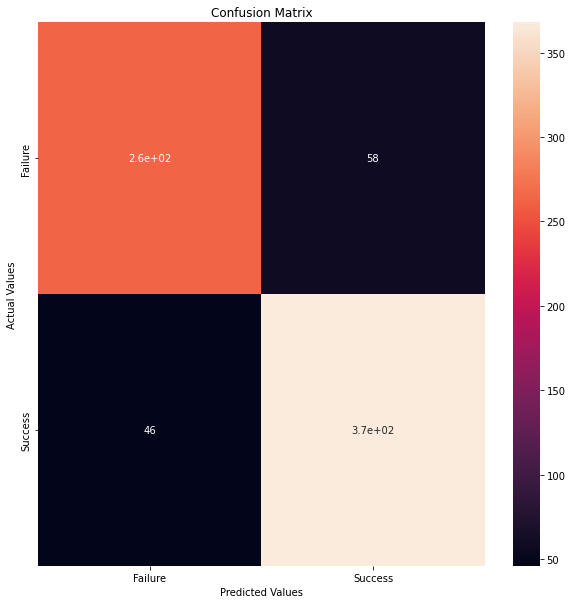

In [23]:
# confusion matrix heat map
plot = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, plot)
plt.figure(figsize = (10,10))
plot = sn.heatmap(confusionMatrix, annot = True)
# confusion matrix heat map labeling
plot.set_xlabel('Predicted Values')
plot.set_ylabel('Actual Values') 
plot.set_title('Confusion Matrix')
plot.xaxis.set_ticklabels(['Failure', 'Success'])
plot.yaxis.set_ticklabels(['Failure', 'Success'])

In [24]:
# this model only uses columns that do not have significant amounts of multicollinearity
drop_cols = ['Age','RestingBP','MaxHR','ST_Slope_Flat','ST_Slope_Up','HeartDisease']
X = df_encoded.drop(columns=drop_cols)
y = df['HeartDisease']

In [28]:
# splits data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.8, shuffle=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# runs logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
model_pred = model.score(X_test, y_test)
print(f'Prediction accuracy of model: {model_pred}')

Prediction accuracy of model: 0.8571428571428571


[Text(0, 0.5, 'Failure'), Text(0, 1.5, 'Success')]

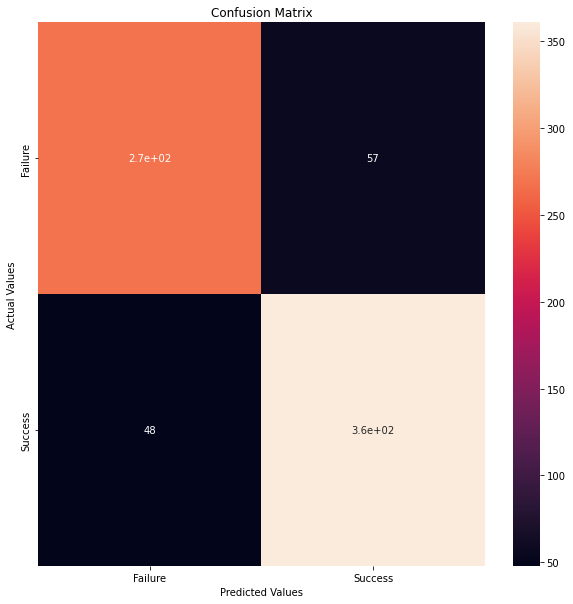

In [29]:
# confusion matrix heat map
plot = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, plot)
plt.figure(figsize = (10,10))
plot = sn.heatmap(confusionMatrix, annot = True)
# confusion matrix heat map labeling
plot.set_xlabel('Predicted Values')
plot.set_ylabel('Actual Values') 
plot.set_title('Confusion Matrix')
plot.xaxis.set_ticklabels(['Failure', 'Success'])
plot.yaxis.set_ticklabels(['Failure', 'Success'])

Overall, we get an accuracy that is above 0.85, which is relatively high. The confusion matrix shows there is not a significant amount of False Positive or False Negative outcomes, while there are significant amounts of True Positive and True Negative outcomes. Our model seems to be running well.

# Support Vector Machine

In [14]:
# this model uses all of the columns in the dataset
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
# splits data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.8, shuffle=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# runs SVM model
model = SVC(kernel='linear', C=1.0) 
model.fit(X_train, y_train)
model_pred = model.score(X_test, y_test)
print(f'Prediction accuracy of model: {model_pred}')

Prediction accuracy of model: 0.8598639455782313


[Text(0, 0.5, 'Failure'), Text(0, 1.5, 'Success')]

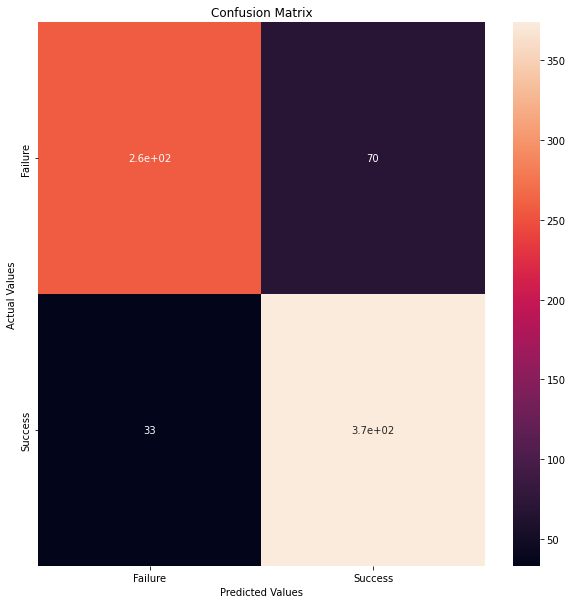

In [16]:
# confusion matrix heat map
plot = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, plot)
plt.figure(figsize = (10,10))
plot = sn.heatmap(confusionMatrix, annot = True)
# confusion matrix heat map labeling
plot.set_xlabel('Predicted Values')
plot.set_ylabel('Actual Values') 
plot.set_title('Confusion Matrix')
plot.xaxis.set_ticklabels(['Failure', 'Success'])
plot.yaxis.set_ticklabels(['Failure', 'Success'])

Overall, we get an accuracy that is above 0.86, which is relatively high. The confusion matrix shows there is not a significant amount of False Positive or False Negative outcomes, while there are significant amounts of True Positive and True Negative outcomes. Our model seems to be running well, but it could be improved by finding the best hyperparameters.

Kernel: linear, C: 0.1, Accuracy: 0.87


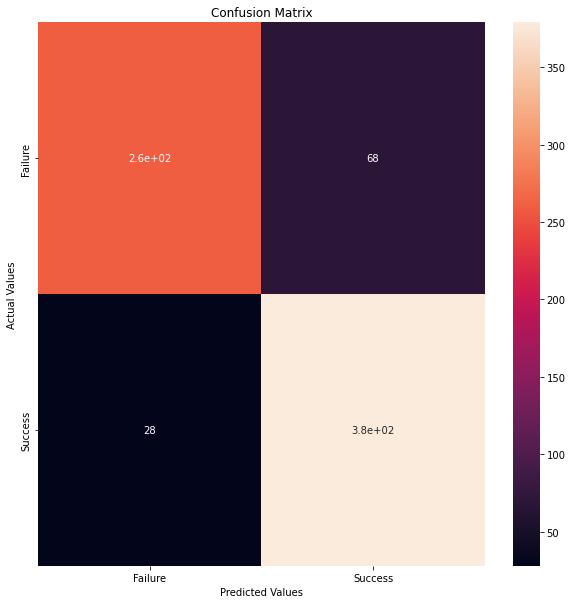

Kernel: linear, C: 1, Accuracy: 0.86


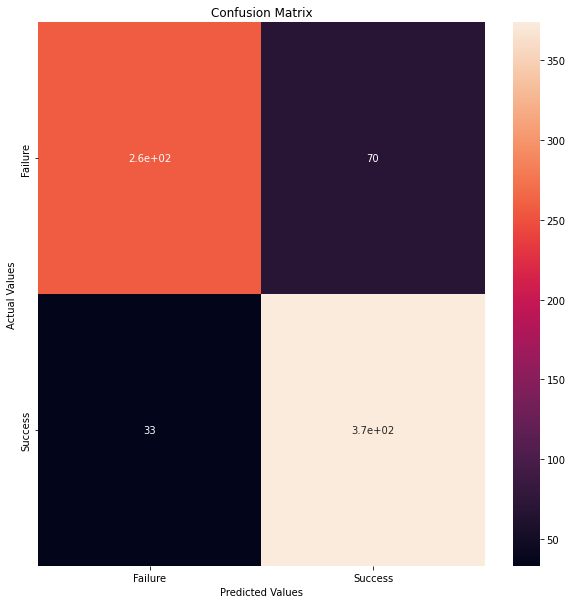

Kernel: linear, C: 10, Accuracy: 0.87


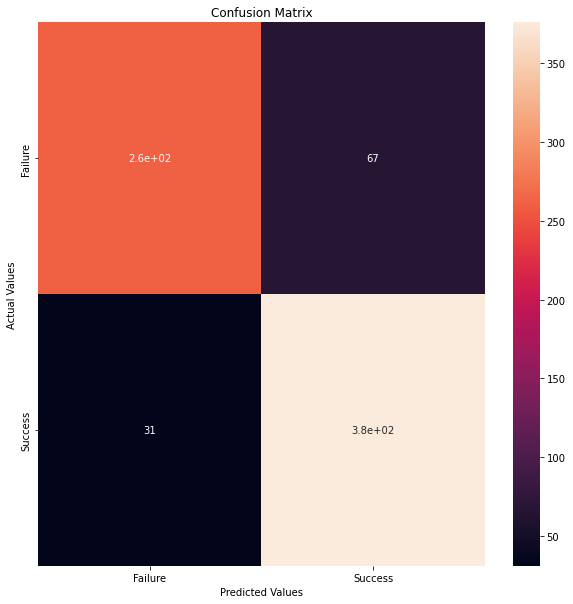

Kernel: linear, C: 100, Accuracy: 0.86


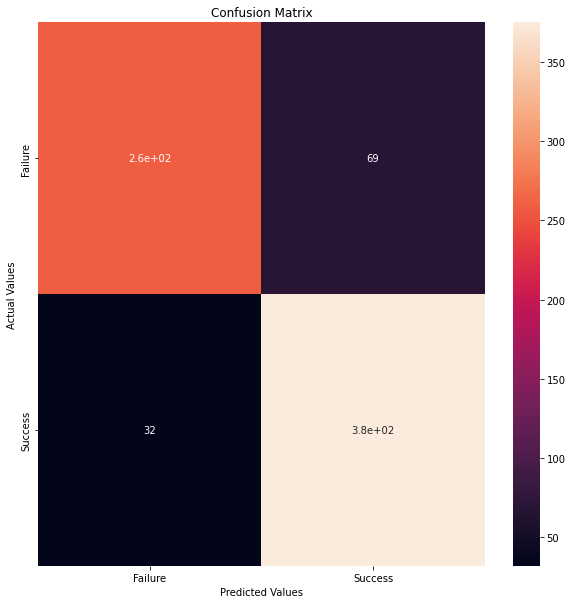

Kernel: rbf, C: 0.1, Accuracy: 0.83


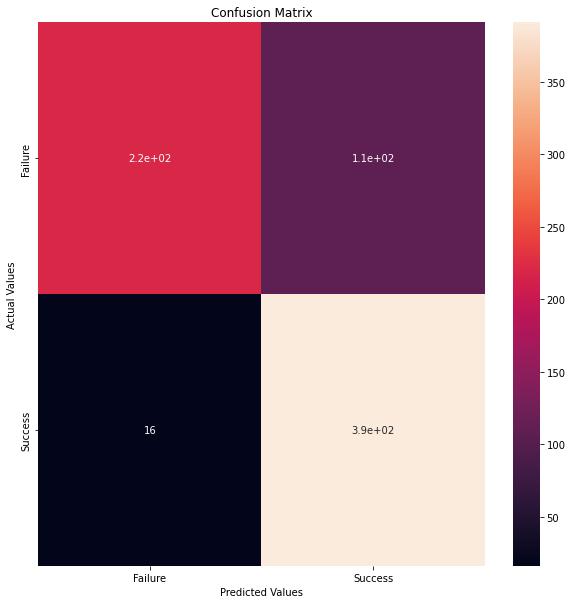

Kernel: rbf, C: 1, Accuracy: 0.86


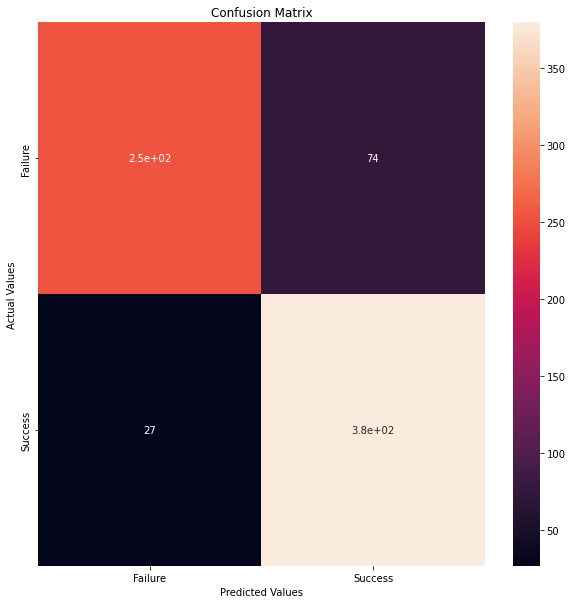

Kernel: rbf, C: 10, Accuracy: 0.82


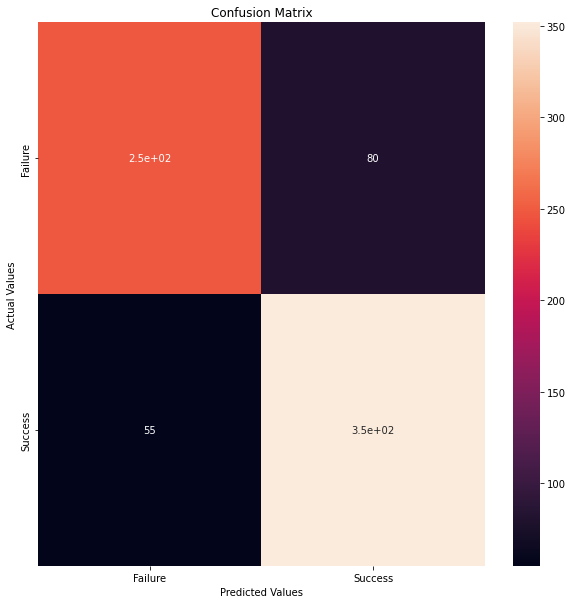

Kernel: rbf, C: 100, Accuracy: 0.79


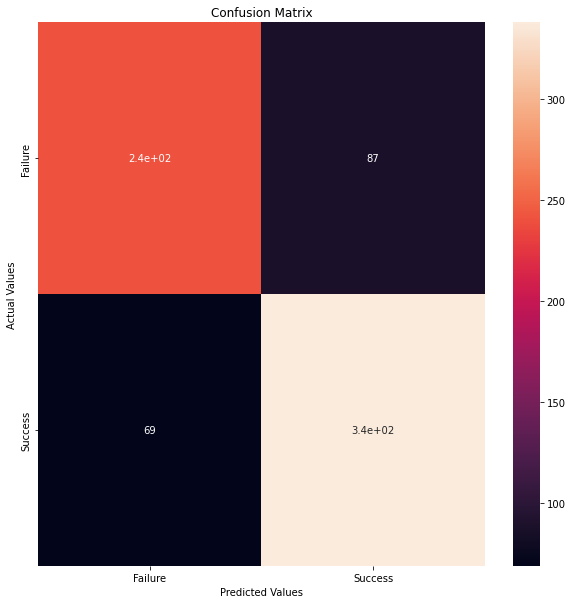

Kernel: poly, C: 0.1, Accuracy: 0.76


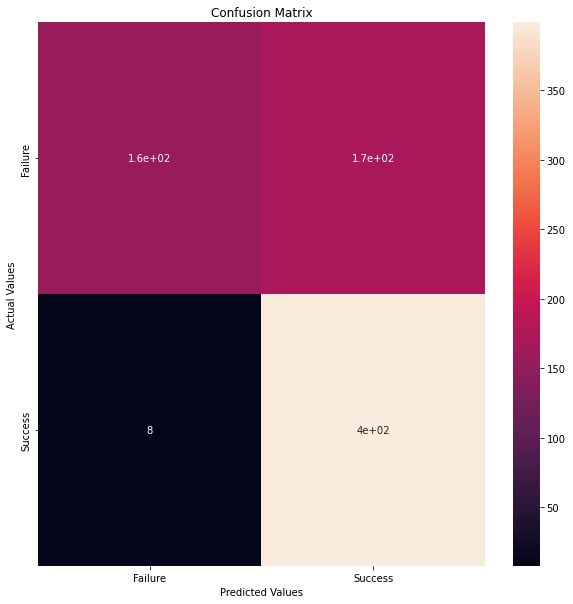

Kernel: poly, C: 1, Accuracy: 0.84


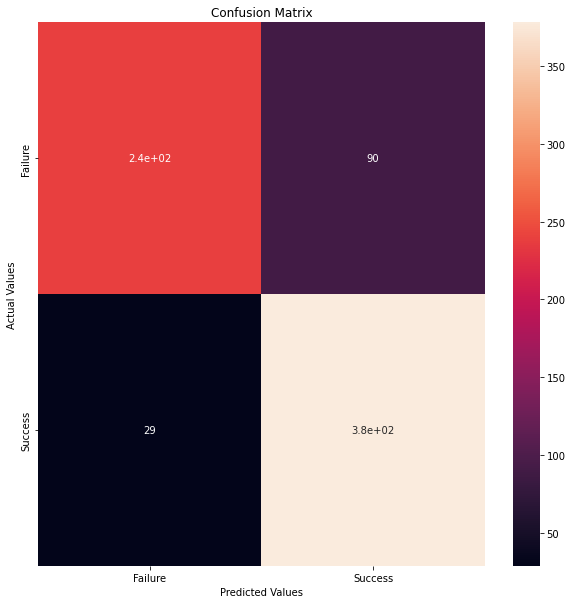

Kernel: poly, C: 10, Accuracy: 0.81


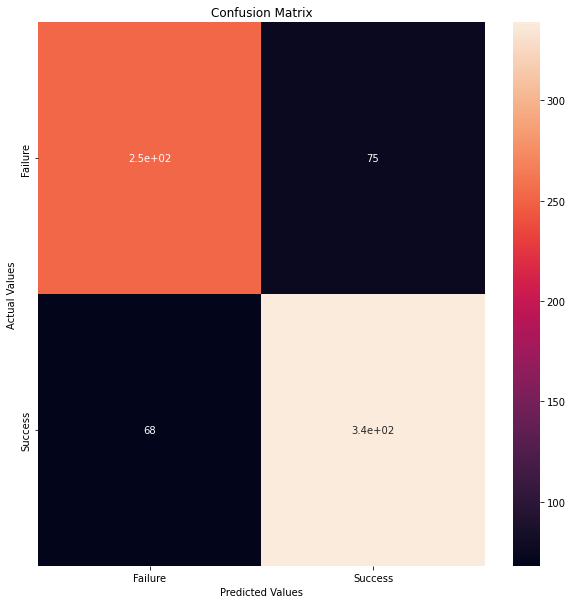

Kernel: poly, C: 100, Accuracy: 0.75


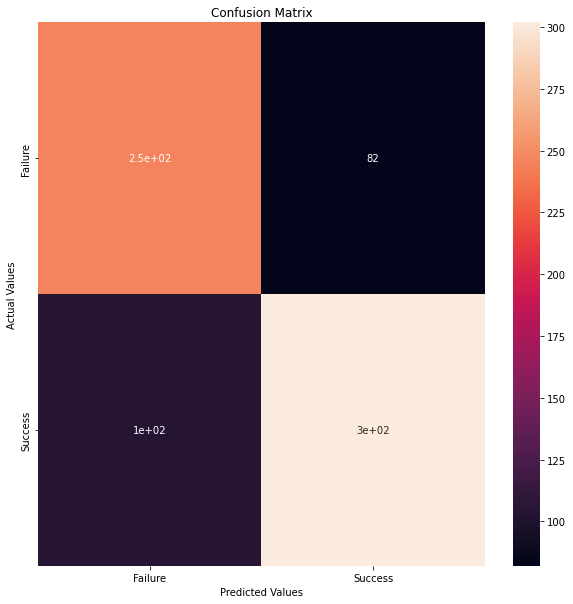

In [20]:
kernels = ['linear', 'rbf', 'poly']
hyperparameters = [0.1, 1, 10, 100]

for j in kernels:
    for i in hyperparameters:
        model = SVC(kernel=j, C=i)
        model.fit(X_train, y_train)
        model_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, model_pred)
        print(f'Kernel: {j}, C: {i}, Accuracy: {accuracy:.2f}')
        confusionMatrix = confusion_matrix(y_test, model_pred)
        plt.figure(figsize=(10, 10))
        plot = sn.heatmap(confusionMatrix, annot=True)
        plot.set_xlabel('Predicted Values')
        plot.set_ylabel('Actual Values')
        plot.set_title('Confusion Matrix')
        plot.xaxis.set_ticklabels(['Failure', 'Success'])
        plot.yaxis.set_ticklabels(['Failure', 'Success'])
        plt.show()


It seems that the best hyperparameters for this model to result in the highest accuracy are Kernel = linear and c = 0.1. This allows for a high accuracy of 0.87.

# Random Forest

Here we use Random Forest. Let's see if we can use GridSearchCV to determine the hyperparameters that result in the highest accuracy for this model:

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Prediction accuracy of model: 0.85


[Text(0, 0.5, 'Failure'), Text(0, 1.5, 'Success')]

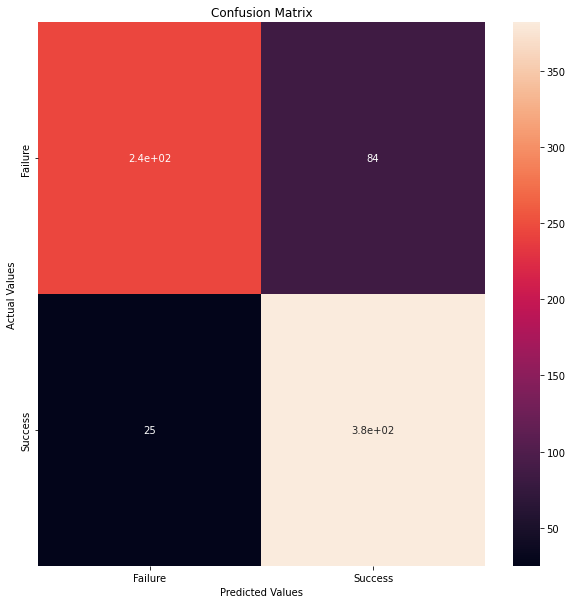

In [18]:
# hyper parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', None],
    'bootstrap': [True, False]
}

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Using GridSearchCV to find the best hyperparameters for most accuracy in model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f'Best Hyperparameters: {best_params}')

# Create a Random Forest model with the best hyperparameters
model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       bootstrap=best_params['bootstrap'])
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

# Results
print(f'Prediction accuracy of model: {accuracy:.2f}')

# confusion matrix heat map
plt.figure(figsize = (10,10))
plot = sn.heatmap(confusionMatrix, annot = True)
# confusion matrix heat map labeling
plot.set_xlabel('Predicted Values')
plot.set_ylabel('Actual Values') 
plot.set_title('Confusion Matrix')
plot.xaxis.set_ticklabels(['Failure', 'Success'])
plot.yaxis.set_ticklabels(['Failure', 'Success'])

It seems that the best hyperparameters are: ('bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200). This results in an accuracy of 0.85. 